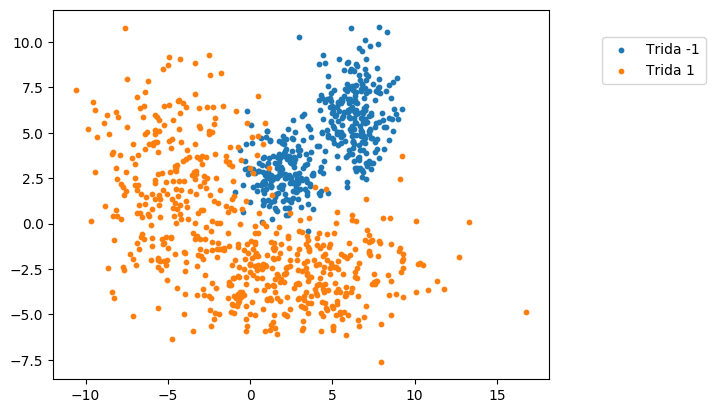

PyObject <matplotlib.legend.Legend object at 0x7fe22b31e190>

In [49]:
using PyPlot
using Distributions


# L2 SVM
# max(0, 1 - y_i(x_i*w + b))

# generovani 2D dat

mean1 = [2.,3.]
C = [1.5 0; 0 1.8]
d = MvNormal(mean1, C)
x1 = rand(d, 200)'

mean2 = [-4.5,2.75]
C2 = [6.5 0; 0 8.1]
d2 = MvNormal(mean2, C2)
x2 = rand(d2, 250)'

mean3 = [6.25,6.]
C3 = [1.5 0; 0 2.8]
d3 = MvNormal(mean3, C3)
x3 = rand(d3, 250)'

mean4 = [2.5,-2.75]
C4 = [14.5 0; 0 3.1]
d4 = MvNormal(mean4, C4)
x4 = rand(d4, 350)'

y1 = -1.0.*ones(size(x1)[1])
y2 = ones(size(x2)[1])
y3 = -1.0.*ones(size(x3)[1])
y4 = 1.0.*ones(size(x4)[1])


x1 = vcat(x1,x3)
y1 = vcat(y1,y3)

x2 = vcat(x2,x4)
y2 = vcat(y2,y4)

X = vcat(x1,x2)
y = vcat(y1,y2)

fig = figure()
PyPlot.scatter(x1[:,1],x1[:,2], s=10, label="Trida -1")
PyPlot.scatter(x2[:,1],x2[:,2], s=10, label="Trida 1")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)

In [50]:
function grad_w(X,y,w,b)
       
    m = 1.0./(1.0 .+ exp.(y.*((X*w) .+ b[1])) )
    g = (-m.*y).*X    
    return sum(g,dims=1)'
end

function grad_b(X,y,w,b)

    m = 1.0./(1.0 .+ exp.(y.*((X*w) .+ b[1])) )
    g = -(m.*y)
    
    return sum(g,dims=1)'
end

function grad_descend(X,y,w0,b0, step_w, step_b, l1, l2)
    i = 0
    g_norm_w = 1.0    
    g_norm_b = 1.0
    
    while (i<5.0e6 && (g_norm_w > 0.025 || g_norm_b > 0.025))
        
        i=i+1
        g_w = grad_w(X,y,w0,b0) .+ l1.*w0
        g_b = grad_b(X,y,w0,b0) .+ l2.*b0
        
        
        w1 = w0 .- step_w.*(g_w)
        b1 = b0 .- step_b.*(g_b)
        
        w0 = w1
        b0 = b1
        
        g_norm_w = sqrt(sum(g_w.*g_w))
        g_norm_b = sqrt(g_b[1]*g_b[1])

        
        if mod(i, 1.0e4)==0
            println("iter = ", i)
            println("  w = ", w0, ",  b = ", b0[1])
            println("g norm w = ", g_norm_w)
            println("g norm b = ", g_norm_b)
            println()
        end
    end 
    
    return w0, b0
end

grad_descend (generic function with 1 method)

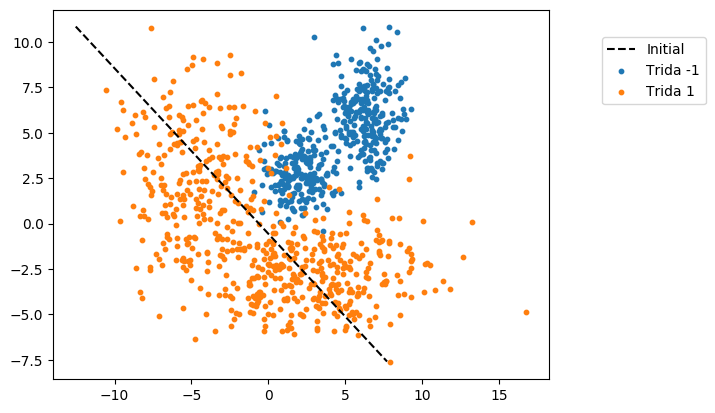

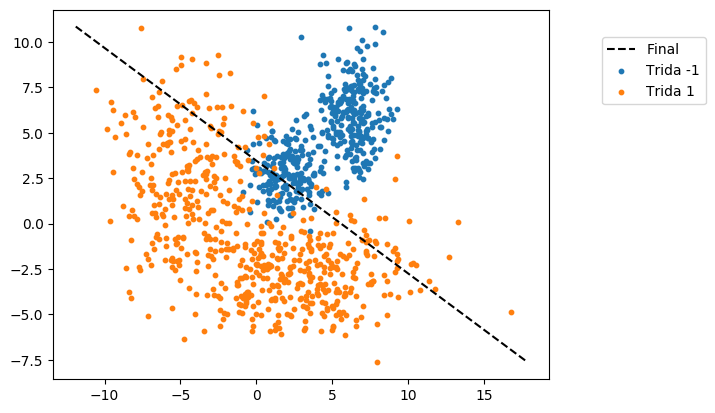

w0 = [-4.648825226893351, -5.108588344649621]
b0 = -2.8405


PyObject <matplotlib.legend.Legend object at 0x7fe22b253310>

In [51]:
# inicializace
b0 = rand(-5.0:0.0001:5.0).*ones(size(X)[1])
x1 = X[:,1]
x2 = X[:,2]
c1 = [mean(x1[y.==-1]), mean(x2[y.==-1])]
c2 = [mean(x1[y.==1]), mean(x2[y.==1])]
w0 = c2 - c1
println("w0 = ", w0)
println("b0 = ", b0[1])

y_max = maximum(X[:,2])
y_min = minimum(X[:,2])

x_max = (-b0[1] .- w0[2].*y_max)./ w0[1]
x_min = (-b0[1] .- w0[2].*y_min)./ w0[1]
x_vis0 = collect(min(x_min,x_max): 0.001: max(x_min,x_max))
line0 = (-b0[1] .- w0[1].*x_vis0)./ w0[2]


fig = figure()
PyPlot.scatter(x1[y.==-1],x2[y.==-1], s=10, label="Trida -1")
PyPlot.scatter(x1[y.==1], x2[y.==1], s=10, label="Trida 1")
PyPlot.plot(x_vis0, line0, "k--", label = "Initial")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)


##########################################################

w,b = grad_descend(X,y,w0,b0, 1.0e-3, 1.0e-3, 0.0, 0.0)


x_max = (-b[1] .- w[2].*y_max)./ w[1]
x_min = (-b[1] .- w[2].*y_min)./ w[1]
x_vis = collect(min(x_min,x_max): 0.001: max(x_min,x_max))

line = (-b[1] .- w[1].*x_vis)./ w[2]


fig = figure()
PyPlot.scatter(x1[y.==-1],x2[y.==-1], s=10, label="Trida -1")
PyPlot.scatter(x1[y.==1], x2[y.==1], s=10, label="Trida 1")
PyPlot.plot(x_vis, line, "k--", label = "Final")


legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)

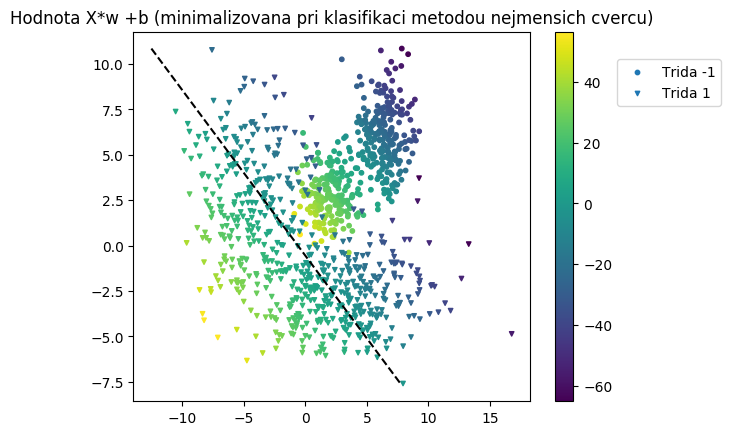

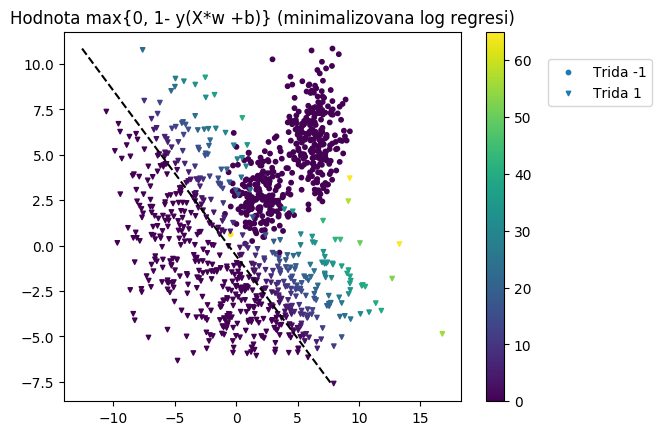

PyObject <matplotlib.legend.Legend object at 0x7fe22af1d150>

In [53]:
# Srovnani ztratovych funkci
#   Nej. ctvrece = vsechny body maji vliv
#   Log regrese = body klasifikovane dobre maji postupne nizsi vliv


hod=X*w0

fig = figure()
scatter(x1[y.==-1],x2[y.==-1], c=vec(hod[y.==-1] .+b0[1]), marker="o", s=10, label="Trida -1")
scatter(x1[y.==1],x2[y.==1], c=vec(hod[y.==1] .+b0[1]), marker ="v", s=10, label="Trida 1")

plot(x_vis0, line0, "k--")
colorbar()
title("Hodnota X*w +b (minimalizovana pri klasifikaci metodou nejmensich cvercu)")
legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=2.0)

hodnota = log.(1 .+ exp.(-y.*(X*w0 .+ b0[1])))


fig = figure()
scatter(x1[y.==-1],x2[y.==-1], c=hodnota[y.==-1], marker="o", s=10, label="Trida -1")
scatter(x1[y.==1],x2[y.==1], c=hodnota[y.==1], marker ="v", s=10, label="Trida 1")
plot(x_vis0, line0, "k--")
colorbar()
title("Hodnota max{0, 1- y(X*w +b)} (minimalizovana log regresi)")
legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=2.0)